In [1]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
#Se agregarán más en cuanto avance el temario de clase

# Contexto de la Base de Datos
En este proyecto, sobre la base de las especificaciones móviles, como la energía de la batería, 3G habilitado, wifi, Bluetooth, Ram, etc., estamos prediciendo el rango de precios del móvil.

# Curiosidad
Ver que componentes hacen màs caros a un telèfono y poder comparar los telèfonos con marcas conocidas y poder establecer una relaciòn entre los componentes y las marcas

# Objetivos de la Base de Datos
Es desarrollar un modelo de predicción de precios de teléfonos móviles basado en las variables proporcionadas en el dataset. Utilizando las características como "battery_power", "clock_speed", "ram", "px_height", "px_width" y "MEMORIA INTERNA".

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

telefono= pd.read_csv("/content/drive/MyDrive/EstadisticaProyecto/PredictPrecioTelefono/train.csv")
telefono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Variables Numericas
battery_power: Capacidad de la batería en mAh.

clock_speed: Velocidad del reloj del procesador en GHz.

fc: Megapíxeles de la cámara frontal.

int_memory: Memoria interna en GB.

m_dep: Profundidad del dispositivo en cm.

mobile_wt: Peso del dispositivo en gramos.

n_cores: Número de núcleos del procesador.

pc: Velocidad del procesador en GHz.

px_height: Altura de la resolución de pantalla en píxeles.

px_width: Ancho de la resolución de pantalla en píxeles.

ram: Memoria RAM en MB.

sc_h: Altura de la pantalla en cm.

sc_w: Ancho de la pantalla en cm.

talk_time: Tiempo de conversación en horas.


# Variables categoricas

blue: Indicador de Bluetooth (1/0).

dual_sim: Indicador de doble tarjeta SIM (1/0).

four_g: Indicador de compatibilidad con red 4G (1/0).

three_g: Indicador de compatibilidad con red 3G (1/0).

touch_screen: Indicador de pantalla táctil (1/0).

wifi: Indicador de compatibilidad con Wi-Fi (1/0).

price_range: Rango de precios al que pertenecen los dispositivos móviles. (1 para bajo precio, 2 para precio medio, 3 para precio alto)

In [4]:
#limites del dataset son [0,2000]

tam_muestra = 700
df = telefono.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 700 registros


In [5]:
factor = list(df.loc[:,df.nunique() < 10]);
df[factor] = df[factor].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1860 to 86
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   battery_power  700 non-null    int64   
 1   blue           700 non-null    category
 2   clock_speed    700 non-null    float64 
 3   dual_sim       700 non-null    category
 4   fc             700 non-null    int64   
 5   four_g         700 non-null    category
 6   int_memory     700 non-null    int64   
 7   m_dep          700 non-null    float64 
 8   mobile_wt      700 non-null    int64   
 9   n_cores        700 non-null    category
 10  pc             700 non-null    int64   
 11  px_height      700 non-null    int64   
 12  px_width       700 non-null    int64   
 13  ram            700 non-null    int64   
 14  sc_h           700 non-null    int64   
 15  sc_w           700 non-null    int64   
 16  talk_time      700 non-null    int64   
 17  three_g        700 non-null    ca

In [6]:
# !pip install ydata_profiling


In [7]:
# telefono
# import ydata_profiling
# ydata_profiling.ProfileReport(df)

In [8]:
df.nunique()

battery_power    547
blue               2
clock_speed       26
dual_sim           2
fc                19
four_g             2
int_memory        63
m_dep             10
mobile_wt        120
n_cores            8
pc                21
px_height        561
px_width         552
ram              646
sc_h              15
sc_w              19
talk_time         19
three_g            2
touch_screen       2
wifi               2
price_range        4
dtype: int64

In [9]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,1230.614286,1.520286,4.475714,31.650000,0.492286,141.058571,10.034286,663.810000,1262.781429,2125.645714,12.482857,6.071429,11.051429
std,431.979692,0.806636,4.376519,17.778612,0.288646,35.424194,6.157585,450.414998,430.069991,1091.190201,4.154181,4.338078,5.428973
min,502.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,850.750000,0.700000,1.000000,16.000000,0.200000,110.750000,4.000000,286.750000,891.750000,1199.750000,9.000000,2.000000,6.000000
50%,1214.000000,1.500000,3.000000,30.000000,0.500000,142.000000,10.000000,604.000000,1264.000000,2175.000000,13.000000,5.000000,11.000000
75%,1596.250000,2.200000,7.000000,46.000000,0.725000,170.000000,15.000000,964.500000,1643.500000,3088.000000,16.000000,9.000000,16.000000
max,1997.000000,3.000000,18.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1997.000000,3996.000000,19.000000,18.000000,20.000000


In [10]:
df.describe(exclude = np.number)

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi,price_range
count,700,700,700,700,700,700,700,700
unique,2,2,2,8,2,2,2,4
top,1,0,0,4,1,1,1,3
freq,352,363,350,97,531,351,376,178


# Ranking de efectos

In [11]:
# Eliminar variable objetivo continua
varObjBin = telefono['price_range']
inputHD = telefono.drop(['price_range'],axis=1)
#funcion de Cramer
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer
# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(inputHD.apply(lambda x: cramers_v(x,varObjBin)),columns=['VCramer'])
cramertop7 = tablaCramer.VCramer.sort_values(ascending=False)[:7]
cramertop7 = pd.DataFrame(cramertop7,columns=['VCramer'])
px.bar(cramertop7,x=cramertop7.VCramer,title='Relaciones frente al Precio').update_yaxes(categoryorder="total ascending").show()
#Este gráfico nos dice que variables tienen más importancia y más relevancia frente a la variable objetivo,
#esto quiere decir que entre mayor puntuacion se tenga en estas variables,

Estos son las variables que influyen mayormente a la variable independiente "precio_calidad"

# Histogramas

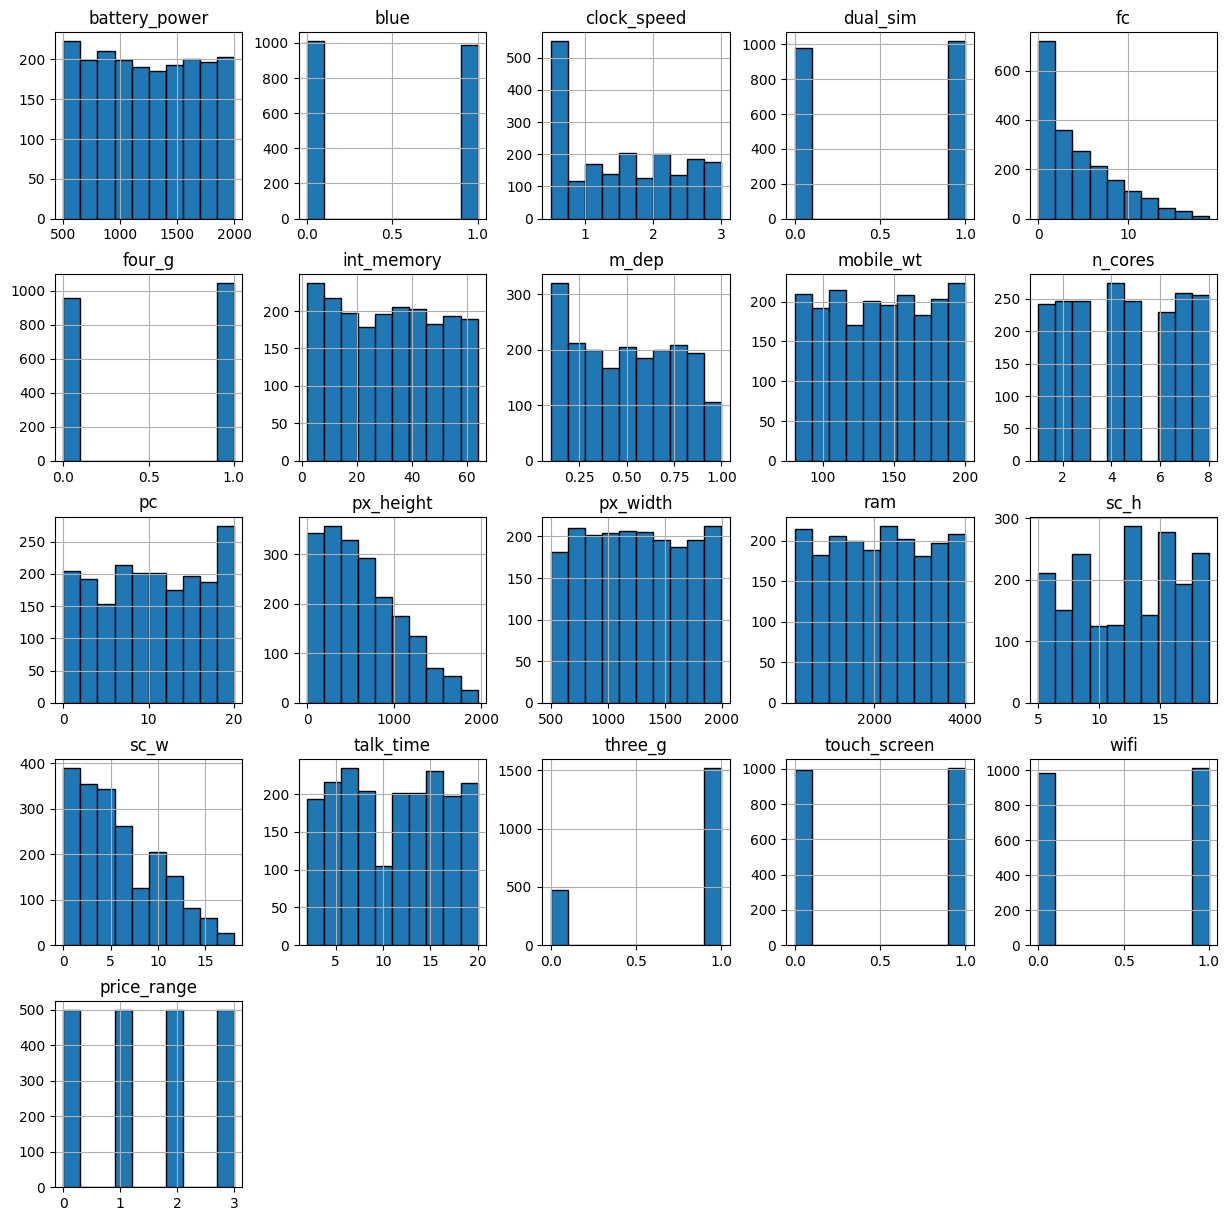

In [12]:
telefono.hist(edgecolor='black',figsize=(15,15))
plt.show()

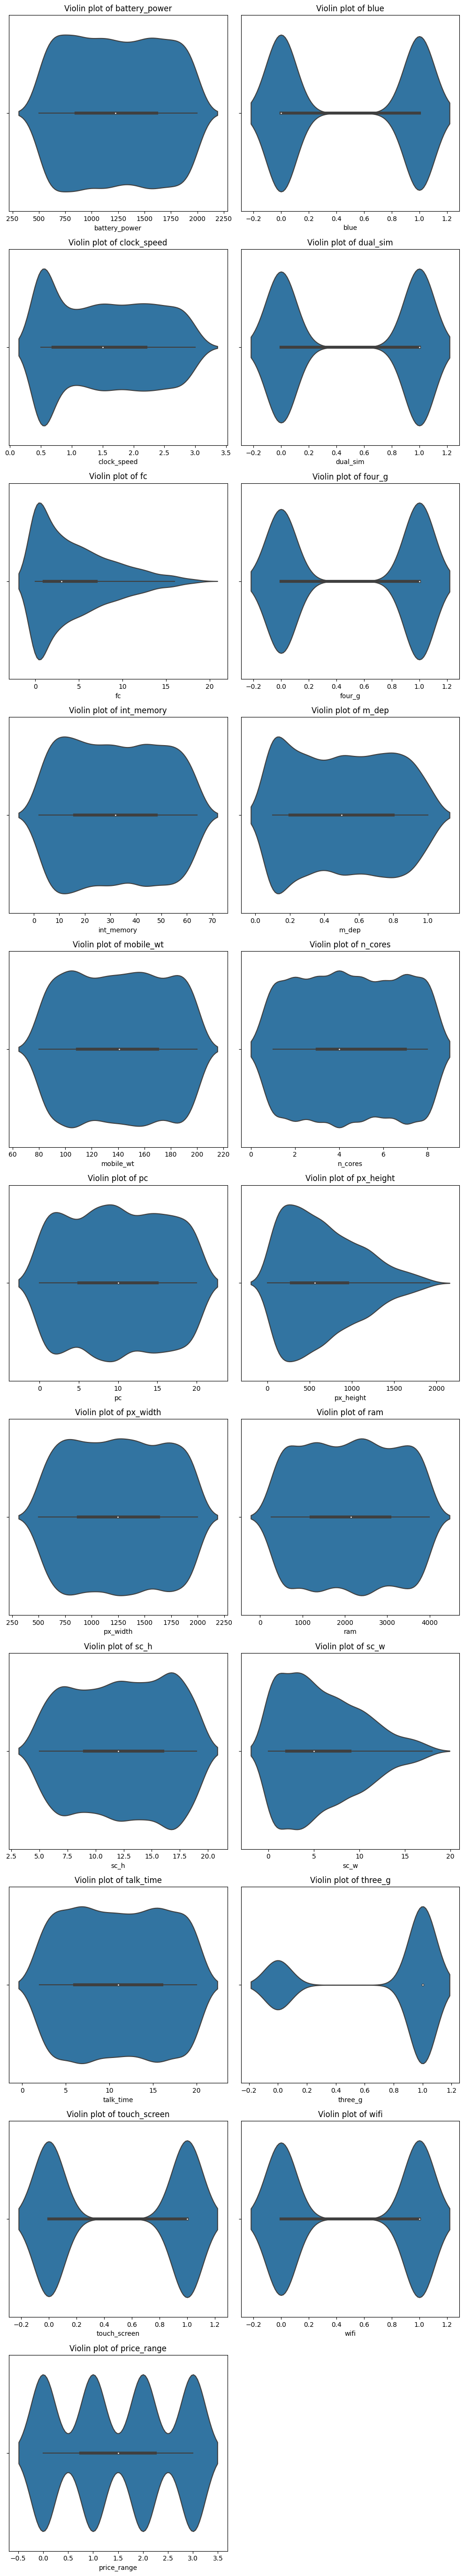

In [13]:

# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = telefono.select_dtypes(include=['float64', 'int64']).columns

num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.violinplot(x=telefono[column])
    plt.title(f'Violin plot of {column}')

plt.tight_layout()
plt.show()

# Interpretación de las distribuciones
La distribución de la variable de "batería" esta sesgada a la derecha, lo que significa que la mayoría de los teléfonos tienen una potencia de batería de menos de 1000 mAh.

La distribución de la variable "int_memory" también esta sesgada a la derecha, con la mayoría de los teléfonos que tienen una memoria interna de menos de 1000 GB.

La distribución de la variable "touch_screen" es unimodal, con la mayoría de los teléfonos que tienen un tamaño de pantalla de entre 4 y 5 pulgadas.

La distribución de la variable "n_cores" es unimodal, con la mayoría de los teléfonos que tienen un procesador de cuatro núcleos.

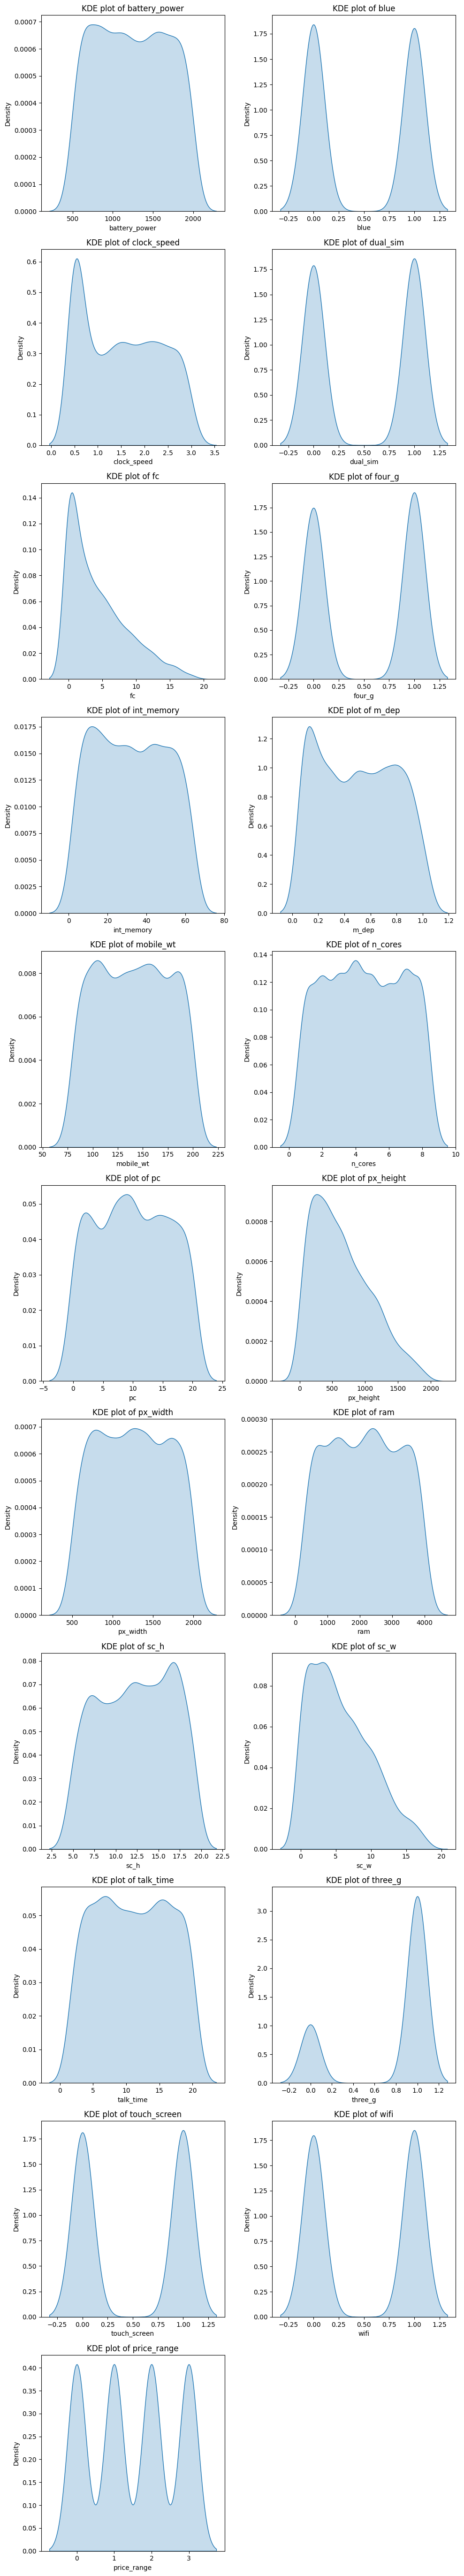

In [14]:
# Obtener las columnas numéricas (excluyendo 'Outcome')
numeric_columns = telefono.select_dtypes(include=['float64', 'int64']).columns

num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=telefono[column], fill=True)
    plt.title(f'KDE plot of {column}')

plt.tight_layout()
plt.show()

<ipython-input-15-00d0b1cd8367>:10: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-15-00d0b1cd8367>:11: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



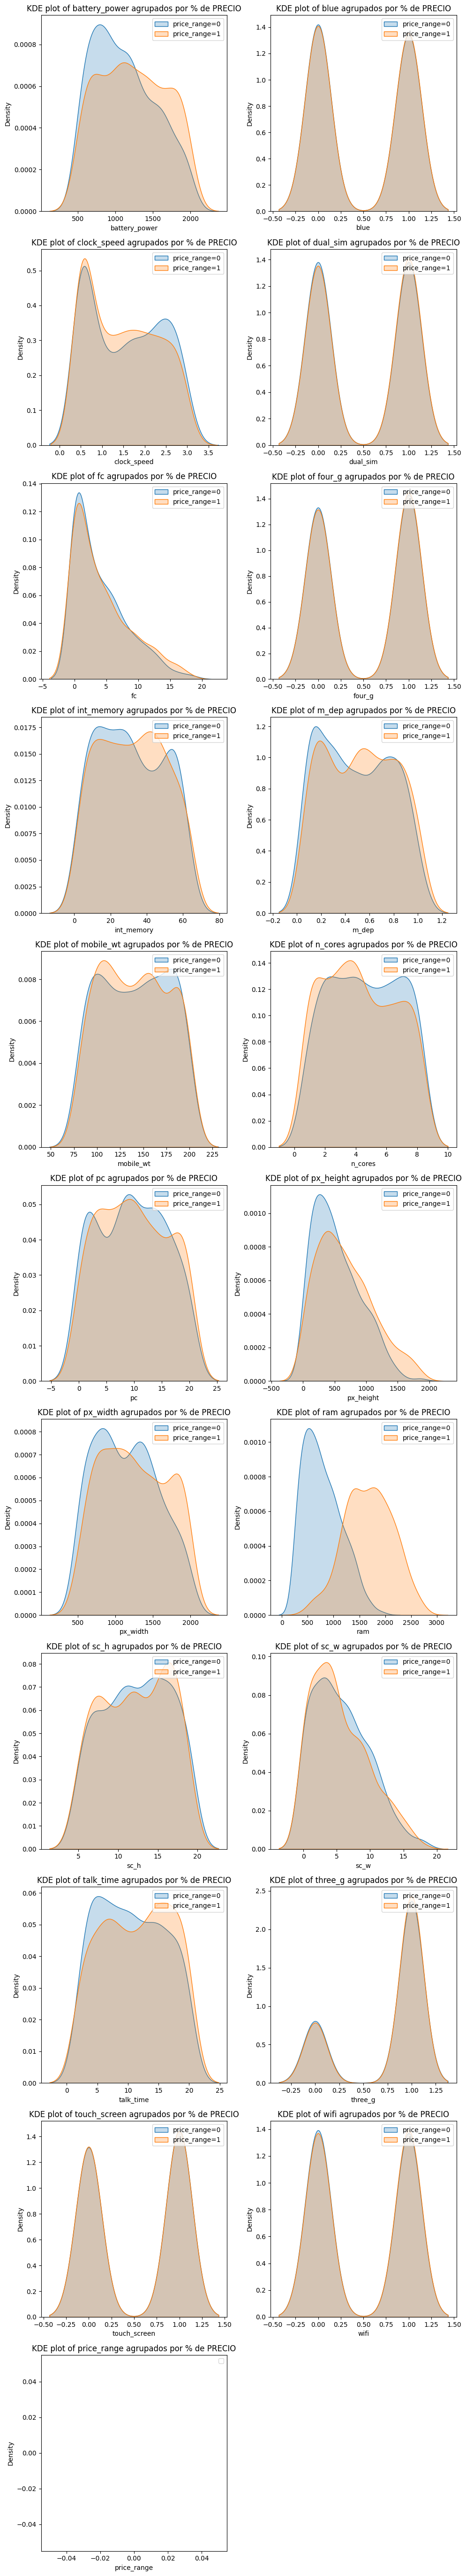

In [15]:
numeric_columns = telefono.select_dtypes(include=['float64', 'int64']).columns

num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=telefono[telefono['price_range']==0][column], label='price_range=0', fill=True)
    sns.kdeplot(data=telefono[telefono['price_range']==1][column], label='price_range=1', fill=True)
    plt.title(f'KDE plot of {column} agrupados por % de PRECIO')
    plt.legend()

plt.tight_layout()
plt.show()

# Interpretación de los KDE Plots
El pico de la función de densidad de probabilidad para la potencia de la batería está alrededor de 800 mAh. Esto sugiere que la mayoría de los teléfonos tienen una potencia de batería de alrededor de 800 mAh.

El pico de la función de densidad de probabilidad para la memoria interna está alrededor de 128 GB. Esto sugiere que la mayoría de los teléfonos tienen una memoria interna de alrededor de 128 GB.

El pico de la función de densidad de probabilidad para el tamaño de pantalla está alrededor de 4.5 pulgadas. Esto sugiere que la mayoría de los teléfonos tienen un tamaño de pantalla de alrededor de 4.5 pulgadas.

El pico de la función de densidad de probabilidad para el número de núcleos está alrededor de 4. Esto sugiere que la mayoría de los teléfonos tienen un procesador de cuatro núcleos.

# Correlacion de las variables

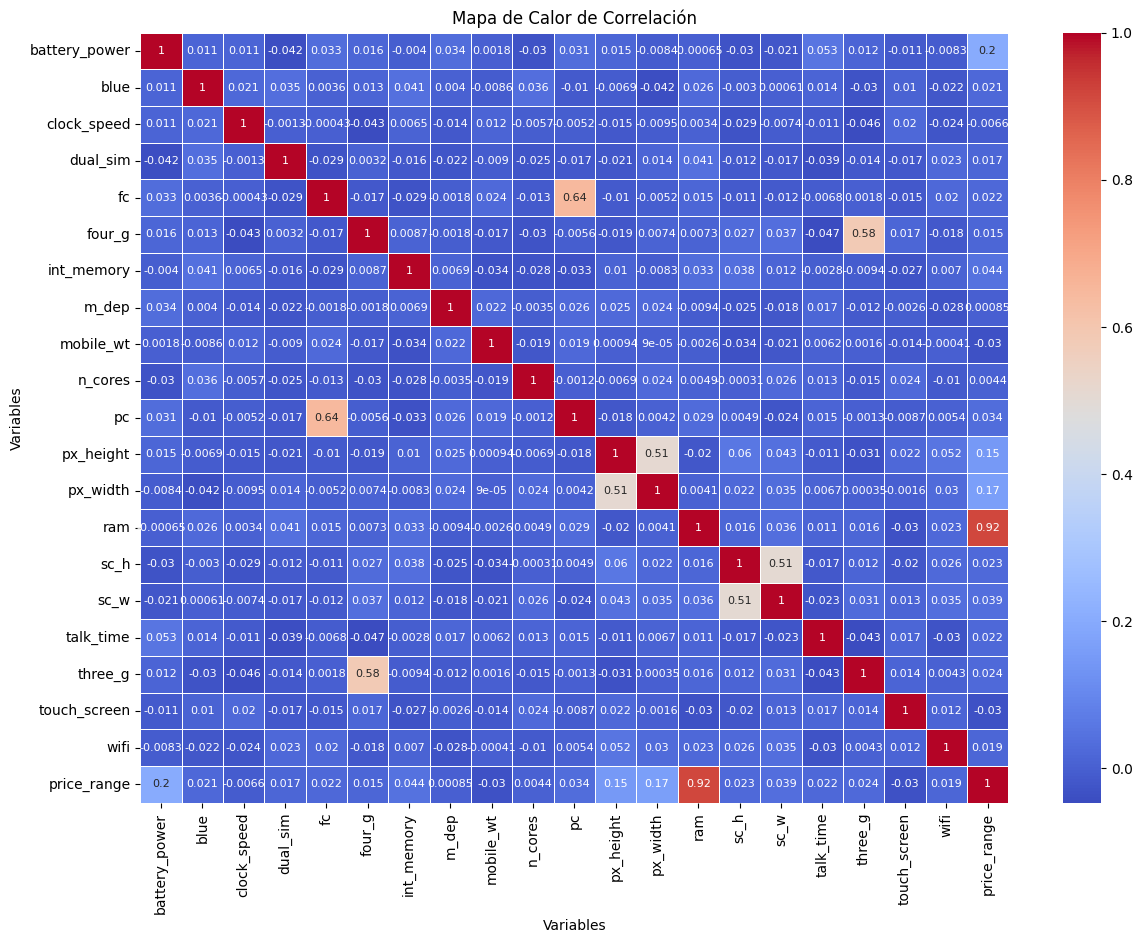

In [16]:
correlation_matrix = telefono.corr()  # Calculate the correlation matrix

plt.figure(figsize=(14, 10))

# Generate the heatmap using Seaborn with increased linewidths
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

# Customize the heatmap
plt.title('Mapa de Calor de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the heatmap
plt.show()

# Interpretación de resultados de correlación
Se observa una correlación positiva entre las variables "bateria" y "price_range", "int_memory" y "price_range", "sc_width" y "price_range", y "n_cores" y "price_range". Esto sugiere que a medida que aumenta el valor de un atributo, también tiende a aumentar el valor del otro atributo.

También observar que existe una correlación negativa entre el tiempo de conversación y el rango de precios. Esto sugiere que a medida que aumenta el tiempo de conversación de un teléfono, el precio del teléfono tiende a disminuir. Es probable que esto se deba a que los teléfonos con tiempos de conversación más largos suelen estar diseñados para su uso en áreas remotas, donde no hay señal celular. Como resultado, estos teléfonos no son tan populares como los teléfonos con tiempos de conversación más cortos

# Modelo de Regresion Logistica

Realizamos un Multi Class Logistic Regression, ya que, nuestra variable objetivo: "price_range" esta compuesta por 3 valores categoricos (0, 1, 2)

In [17]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Obtener los datos (X e y) para la multinomial logistic regression
X = telefono[['ram', 'battery_power', 'px_width', 'px_height', 'sc_w', 'mobile_wt', 'pc']]
y = telefono['price_range']

# Agregar una columna de unos a X para el intercepto del modelo
X = sm.add_constant(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de multinomial logistic regression con statsmodels
model = sm.MNLogit(y_train, X_train)
result = model.fit()

# Obtener el resumen del modelo
summary = result.summary()

# Imprimir el resumen
print(summary)


Optimization terminated successfully.
         Current function value: 0.046411
         Iterations 18
                          MNLogit Regression Results                          
Dep. Variable:            price_range   No. Observations:                 1600
Model:                        MNLogit   Df Residuals:                     1576
Method:                           MLE   Df Model:                           21
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                  0.9665
Time:                        06:19:11   Log-Likelihood:                -74.257
converged:                       True   LL-Null:                       -2217.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
price_range=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -274.7160     82.887     -3.314      0.001    -437.171    -112.261
ram               0

Los resultados de la regresión logística muestran que las siguientes variables son predictores significativos del rango de precios de un teléfono:

ram: La cantidad de RAM en un teléfono está positivamente correlacionada con su rango de precios. Esto significa que los teléfonos con más RAM tienden a ser más caros.

battery_power: La potencia de la batería de un teléfono también está positivamente correlacionada con su rango de precios. Esto significa que los teléfonos con mayor duración de batería tienden a ser más caros.

px_width: El ancho de la pantalla del teléfono está positivamente correlacionado con su rango de precios. Esto significa que los teléfonos con pantallas más grandes tienden a ser más caros.

px_height: La altura de la pantalla del teléfono también está positivamente correlacionada con su rango de precios. Esto significa que los teléfonos con pantallas más grandes tienden a ser más caros.

mobile_wt: El peso del teléfono está negativamente correlacionado con su rango de precios. Esto significa que los teléfonos que pesan más tienden a ser menos caros.

Además, de los resultados obtenidos, tambien podemos interpretar que la probabilidad de que un teléfono esté en el rango de precio 1 es menor que la probabilidad de que un teléfono esté en el rango de precio 2 o 3.

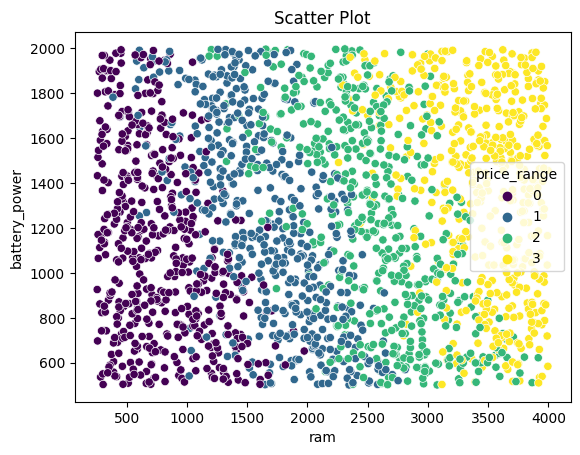

In [18]:
# Data

X = telefono[['ram', 'battery_power']]

y = telefono['price_range']

# Create a DataFrame combining X and y

data = X.copy()

data['price_range'] = y


# Create a scatter plot

sns.scatterplot(x='ram', y='battery_power', hue='price_range', data=data, palette='viridis')


# Set plot labels and title

plt.xlabel('ram')

plt.ylabel('battery_power')

plt.title('Scatter Plot')

# Show the plot

plt.show()

El diagrama de dispersión para el rango de precios 1 muestra que hay un rango de valores de RAM amplio para los teléfonos en este rango de precios. Esto significa que existe una gran variación en la cantidad de RAM que tienen los teléfonos en este rango de precios.

El diagrama de dispersión para el rango de precios 2 muestra que hay un rango más pequeño de valores de RAM para los teléfonos en este rango de precios. Esto significa que hay menos variación en la cantidad de RAM que tienen los teléfonos en este rango de precios.

El diagrama de dispersión para el rango de precios 3 muestra que hay un rango muy estrecho de valores de RAM para los teléfonos en este rango de precios. Esto significa que hay muy poca variación en la cantidad de RAM que tienen los teléfonos en este rango de precios.